# Real-Valued QM Experiment via IBM Quantum (Estimator version)

<b>Note: </b> [Qiskit](https://qiskit.org/) 1.x must be installed for this to run on a local device. Running circuits on actual hardware also requires installation of Qiskit Runtime.

In [4]:
from qiskit import *
import numpy as np
from matplotlib import pyplot as plt

To use `Estimator`, we  need a circuit that creates $|\Psi\rangle = |\Phi_{00}\rangle\otimes|\Phi_{00}\rangle$ and performs the "decoding" to map each Bell state to $\left\{|00\rangle,|01\rangle,|10\rangle,|11\rangle\right\}$ so that Bob's computational-basis measurement identifies a particular Bell state. This operation, performed on qubits $q_{1}q_{2}$ is the opposite of the operation to create $|\Phi_{00}\rangle$.

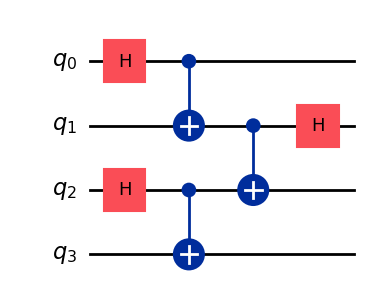

In [5]:
qr = QuantumRegister(4,'q')
circ = QuantumCircuit(qr)

circ.h(0)
circ.cx(0,1)

circ.h(2)
circ.cx(2,3)

circ.cx(1,2)
circ.h(1)

circ.draw('mpl')

For this expriment, Alice uses operators

$$\hat{A}_{1} = \hat{\sigma}^{z},\;\;\;\;\;\; \hat{A}_{2} = \hat{\sigma}^{x},\;\;\;\;\;\; \hat{A}_{3} = \hat{\sigma}^{y},$$

Bob uses

$$\hat{C}_{1} = \frac{\hat{\sigma}^{z}+\hat{\sigma}^{x}}{\sqrt{2}},\;\;\;\;\;\; \hat{C}_{2} = \frac{\hat{\sigma}^{z}-\hat{\sigma}^{x}}{\sqrt{2}},\;\;\;\;\;\; \hat{C}_{3} = \frac{\hat{\sigma}^{z}+\hat{\sigma}^{y}}{\sqrt{2}},$$

$$\hat{C}_{4} = \frac{\hat{\sigma}^{z}-\hat{\sigma}^{y}}{\sqrt{2}},\;\;\;\;\;\; \hat{C}_{5} = \frac{\hat{\sigma}^{x}+\hat{\sigma}^{y}}{\sqrt{2}},\;\;\;\;\;\; \hat{C}_{6} = \frac{\hat{\sigma}^{x}-\hat{\sigma}^{y}}{\sqrt{2}},$$

The weighted sum of probabilities to be computed is

$$\Gamma = \sum_{b}\mathcal{T}_{b},$$

where

$$\mathcal{T}_{b} = (-1)^{b_{2}}(S_{11}^{b}+S_{12}^{b})+(-1)^{b_{1}}(S_{21}^{b}-S_{22}^{b})+(-1)^{b_{2}}(S_{13}^{b}+S_{14}^{b})-(-1)^{b_{1}+b_{2}}(S_{33}^{b}-S_{34}^{b})+(-1)^{b_{1}}(S_{25}^{b}+S_{26}^{b})-(-1)^{b_{1}+b_{2}}(S_{35}^{b}-S_{36}^{b}),$$

Since $b_{1,2}\in\left\{0,1\right\}$, $(-1)^{b_{j}}=\pm 1$, corresponding to the measurement obtained by Bob on that qubit. That is, we can recast $\Gamma$ as

$$\Gamma = \langle \Psi' | \hat{\mathcal{O}} |\Psi'\rangle,$$

where $|\Psi'\rangle = \hat{H}_{1}\mbox{CNOT}_{1,2}|\Psi\rangle$ and

$$\hat{\mathcal{O}} = \hat{\mathcal{O}}_{1} + \hat{\mathcal{O}}_{2} + \hat{\mathcal{O}}_{3}$$
$$\hat{\mathcal{O}}_{1} = \hat{A}_{1}\hat{I}\hat{\sigma}^{z}\hat{C}_{1} + \hat{A}_{1}\hat{I}\hat{\sigma}^{z}\hat{C}_{2} + \hat{A}_{2}\hat{\sigma}^{z}\hat{I}\hat{C}_{1} - \hat{A}_{2}\hat{\sigma}^{z}\hat{I}\hat{C}_{2}$$
$$\hat{\mathcal{O}}_{2} = \hat{A}_{1}\hat{I}\hat{\sigma}^{z}\hat{C}_{3} + \hat{A}_{1}\hat{I}\hat{\sigma}^{z}\hat{C}_{4} - \hat{A}_{3}\hat{\sigma}^{z}\hat{\sigma}^{z}\hat{C}_{3} + \hat{A}_{3}\hat{\sigma}^{z}\hat{\sigma}^{z}\hat{C}_{4}$$
$$\hat{\mathcal{O}}_{3} = \hat{A}_{2}\hat{\sigma}^{z}\hat{I}\hat{C}_{5} + \hat{A}_{2}\hat{\sigma}^{z}\hat{I}\hat{C}_{6} - \hat{A}_{3}\hat{\sigma}^{z}\hat{\sigma}^{z}\hat{C}_{5} + \hat{A}_{3}\hat{\sigma}^{z}\hat{\sigma}^{z}\hat{C}_{6}$$

Here the tensor product is not shown explicitly (e.g., $\hat{A}_{1}\hat{I}\hat{\sigma}^{z}\hat{C}_{1} \equiv \hat{A}_{1}\otimes\hat{I}\otimes\hat{\sigma}^{z}\otimes\hat{C}_{1}$). These operators may be defined in Qiskit using `SparsePauliOp` as follows. Simplification is possibe before this stage, but Qiskit can also simplify the result for us. We simply define each term, sum, and simplify. Here one writes the operator in terms of Pauli "strings" with the notation $\hat{\sigma}^{z}\rightarrow$`Z`.

<b>Note: </b> Because we have been using the opposite state labeling convention, we must reverse the order of the strings. By Qiskit convention, the first operator applies to the <i>bottom</i> qubit, so to preserve the ordering using our notation we would map $\hat{\sigma}^{x}\hat{\sigma}^{z}\hat{I}\hat{\sigma}^{y}\rightarrow$`YIZX`. 

In [6]:
from qiskit.quantum_info import SparsePauliOp

X1IYZ1 = SparsePauliOp.from_list([("ZZIZ",1./np.sqrt(2.)),("XZIZ",1./np.sqrt(2.))])
X1IYZ2 = SparsePauliOp.from_list([("ZZIZ",1./np.sqrt(2.)),("XZIZ",-1./np.sqrt(2.))])
X2YIZ1 = SparsePauliOp.from_list([("ZIZX",1./np.sqrt(2.)),("XIZX",1./np.sqrt(2.))])
X2YIZ2 = SparsePauliOp.from_list([("ZIZX",-1./np.sqrt(2.)),("XIZX",1./np.sqrt(2.))])

X1IYZ3 = SparsePauliOp.from_list([("ZZIZ",1./np.sqrt(2.)),("YZIZ",1./np.sqrt(2.))])
X1IYZ4 = SparsePauliOp.from_list([("ZZIZ",1./np.sqrt(2.)),("YZIZ",-1./np.sqrt(2.))])
X3YYZ3 = SparsePauliOp.from_list([("ZZZY",-1./np.sqrt(2.)),("YZZY",-1./np.sqrt(2.))])
X3YYZ4 = SparsePauliOp.from_list([("ZZZY",1./np.sqrt(2.)),("YZZY",-1./np.sqrt(2.))])

X2YIZ5 = SparsePauliOp.from_list([("XIZX",1./np.sqrt(2.)),("YIZX",1./np.sqrt(2.))])
X2YIZ6 = SparsePauliOp.from_list([("XIZX",1./np.sqrt(2.)),("YIZX",-1./np.sqrt(2.))])
X3YYZ5 = SparsePauliOp.from_list([("XZZY",-1./np.sqrt(2.)),("YZZY",-1./np.sqrt(2.))])
X3YYZ6 = SparsePauliOp.from_list([("XZZY",1./np.sqrt(2.)),("YZZY",-1./np.sqrt(2.))])

ABBC = SparsePauliOp.sum([X1IYZ1,X1IYZ2,X2YIZ1,X2YIZ2,X1IYZ3,X1IYZ4,X3YYZ3,X3YYZ4,X2YIZ5,X2YIZ6,X3YYZ5,X3YYZ6])

ABBC = SparsePauliOp.simplify(ABBC)

Due to cancelations, the result for $\mathcal{O}$ takes the particularly simple form

$$\hat{\mathcal{O}} = 2\sqrt{2}\left(\hat{\sigma}^{x}\hat{\sigma}^{x}\hat{I}\hat{\sigma}^{x} - \hat{\sigma}^{y}\hat{\sigma}^{z}\hat{\sigma}^{z}\hat{\sigma}^{y} + \hat{\sigma}^{z}\hat{I}\hat{\sigma}^{z}\hat{\sigma}^{z}\right)$$

In [7]:
print(ABBC)

SparsePauliOp(['ZZIZ', 'XIZX', 'YZZY'],
              coeffs=[ 2.82842712+0.j,  2.82842712+0.j, -2.82842712+0.j])


The circuit and operator are all we need to use `Estimator` to compute the expectation value directly. 

### Simulation

We can check that the circuit works by simulating the behavior noiselessly using `Estimator` as follows.

In [8]:
from qiskit.primitives import StatevectorEstimator

estimator = StatevectorEstimator()

pub = (
    circ,  # circuit
    [[ABBC]],  # Observables
)

job_result = estimator.run(pubs=[pub]).result()

The expectation value for $\hat{\mathcal{O}}$ and associated estimates of standard measurement error are contained within the job result. For the simulation, the expectation value is computed exactly resulting in no standard error. This will not be the case on real hardware.

The theoretical result should agree with $\langle \Psi' | \hat{\mathcal{O}} | \Psi'\rangle = 6\sqrt{2} \approx 8.485$

In [9]:
ABBC_est = job_result[0].data.evs[0]
dABBC_est = job_result[0].data.stds[0]

In [13]:
print(str(ABBC_est[0]) + '+/-' + str(dABBC_est[0]))

8.485281374238566+/-0.0


### Actual Hardware (with and without error mitigation)
### * Requires Qiskit Runtime and (free) IBM Quantum Account *

The steps for performing the experiment on a real quantum computer are nearly identical. Additionally, `Estimator` makes it very straightforward to apply multiple levels of error mitigation automatically (without any postprocessing). Below we repeat the circuit and operator constructions for convenience.

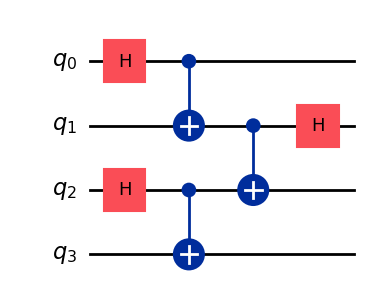

In [14]:
qr = QuantumRegister(4,'q')
circ = QuantumCircuit(qr)

circ.h(0)
circ.cx(0,1)

circ.h(2)
circ.cx(2,3)

circ.cx(1,2)
circ.h(1)

circ.draw('mpl')

In [15]:
from qiskit.quantum_info import SparsePauliOp

X1IYZ1 = SparsePauliOp.from_list([("ZZIZ",1./np.sqrt(2.)),("XZIZ",1./np.sqrt(2.))])
X1IYZ2 = SparsePauliOp.from_list([("ZZIZ",1./np.sqrt(2.)),("XZIZ",-1./np.sqrt(2.))])
X2YIZ1 = SparsePauliOp.from_list([("ZIZX",1./np.sqrt(2.)),("XIZX",1./np.sqrt(2.))])
X2YIZ2 = SparsePauliOp.from_list([("ZIZX",-1./np.sqrt(2.)),("XIZX",1./np.sqrt(2.))])

X1IYZ3 = SparsePauliOp.from_list([("ZZIZ",1./np.sqrt(2.)),("YZIZ",1./np.sqrt(2.))])
X1IYZ4 = SparsePauliOp.from_list([("ZZIZ",1./np.sqrt(2.)),("YZIZ",-1./np.sqrt(2.))])
X3YYZ3 = SparsePauliOp.from_list([("ZZZY",-1./np.sqrt(2.)),("YZZY",-1./np.sqrt(2.))])
X3YYZ4 = SparsePauliOp.from_list([("ZZZY",1./np.sqrt(2.)),("YZZY",-1./np.sqrt(2.))])

X2YIZ5 = SparsePauliOp.from_list([("XIZX",1./np.sqrt(2.)),("YIZX",1./np.sqrt(2.))])
X2YIZ6 = SparsePauliOp.from_list([("XIZX",1./np.sqrt(2.)),("YIZX",-1./np.sqrt(2.))])
X3YYZ5 = SparsePauliOp.from_list([("XZZY",-1./np.sqrt(2.)),("YZZY",-1./np.sqrt(2.))])
X3YYZ6 = SparsePauliOp.from_list([("XZZY",1./np.sqrt(2.)),("YZZY",-1./np.sqrt(2.))])

ABBC = SparsePauliOp.sum([X1IYZ1,X1IYZ2,X2YIZ1,X2YIZ2,X1IYZ3,X1IYZ4,X3YYZ3,X3YYZ4,X2YIZ5,X2YIZ6,X3YYZ5,X3YYZ6])

ABBC = SparsePauliOp.simplify(ABBC)

Next, log into IBM using your account's API token and select a device (either by name or by using the least-busy device)

In [16]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService(channel="ibm_quantum", token="<YOUR-API-HERE>")
overwrite = True

#least-busy option
#backend = service.least_busy(simulator=False, operational=True)
#backend.name

#select particular device
backend = service.backend("ibm_brisbane")
backend.name

'ibm_brisbane'

The next step is to prepare the circuit and operator(s) for execution on a particular device. The native operations known to each device are known as its instruction set architecture (ISA).

In [17]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(circ)

isa_ABBC = ABBC.apply_layout(layout=isa_circuit.layout)

<b>Note: </b> We can specify which qubits are used (e.g., 0,1,2,3) by making the modification:

```pm = generate_preset_pass_manager(backend=backend, optimization_level=3, initial_layout=[0,1,2,3])```

Thanks for Reviewer #3 for pointing this out!

The circuit and operator(s) can no be bundled into a primitive unified bloc (PUB) and executed just as we did with the simulator. The option `{"resilience_level": 0}` pertains to error mitigation. By default the resilience level is set to 1, corresponding to basic readout-error mitigation being applied automatically. The resilience level of 0 results in no error mitigation, and resilience level 2 adds additional types of mitigation to the results. We focus on resilience levels 0 and 1, as the highest level can lead to erroneously large correlations with significant uncertainty.

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator

pub = (
    isa_circuit,  # circuit
    [[isa_ABBC]],         # Observables
)


estimator = Estimator(backend, options={"resilience_level": 0})
#to specify number of shots (e.g., 2000), replace with
#estimator = Estimator(backend, options={"resilience_level": 0, "default_shots": 2000})
#Thanks again to reviewer #3 for that tip!
job = estimator.run(pubs=[pub])

job_result = job.result()

Sometimes it's convenient to interrupt the kernel when a job is queued for a long time. You can check the status in your IBM dashboard. If you pull up the particular job, you can find the job ID to paste below so that you can retrieve the job data at a later time. You can also copy this snippet from the job description with API and job ID prefilled.

In [18]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='<YOUR-API-TOKEN-HERE>')
job = service.job('<JOB-ID-HERE')
job_result = job.result()

In [19]:
ABBC_est = job_result[0].data.evs[0]
dABBC_est = job_result[0].data.stds[0]
print(str(ABBC_est[0]) + '+/-' + str(dABBC_est[0]))

6.49240034835539+/-0.049208669727710166


The non-mitigated result is generally well below the theoretical value. The upper bound for real-valued QM is about 7.66, so we're also well below that. As of 2024, some level of error mitigation was required generate a score that could not be attained with real-valued QM. We can try again with readout error mitigation. The cell below executes the same circuit on the same device. If you wish to switch devices, you would need to perform the ISA conversion step again after selecting a new device.

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(circ)

isa_ABBC = ABBC.apply_layout(layout=isa_circuit.layout)

from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator

pub = (
    isa_circuit,  # circuit
    [[isa_ABBC]],         # Observables
)


estimator = Estimator(backend, options={"resilience_level": 1})
job = estimator.run(pubs=[pub])

job_result = job.result()

In [20]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='<YOUR-API-TOKEN-HERE>')
job = service.job('<JOB-ID-HERE>')
job_result = job.result()

In [22]:
ABBC_est = job_result[0].data.evs[0]
dABBC_est = job_result[0].data.stds[0]
print(str(ABBC_est[0]) + '+/-' + str(dABBC_est[0]))

8.054345093666164+/-0.07672540109839003


## Version information

In [1]:
import qiskit_ibm_runtime

qiskit_ibm_runtime.version.get_version_info()

'0.25.0'

In [2]:
import qiskit 

qiskit.version.get_version_info()

'1.1.1'